In [1]:
# Packages for Data Wrangling
import numpy as np
import pandas as pd
import os
import re
from collections import Counter

# For graphs
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Use cleaner absolute path to find file
path = os.path.abspath('politifact.csv')
df = pd.read_csv(path, index_col=0)

In [3]:
# Check for null values and total number of rows
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16611 entries, 0 to 16610
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   statement  16611 non-null  object
 1   source     16611 non-null  object
 2   link       16611 non-null  object
 3   veracity   16611 non-null  object
dtypes: object(4)
memory usage: 648.9+ KB


# Initially 16611 rows of non-null data

In [4]:
# to see statement in full
pd.set_option('display.max_colwidth', 200) 

# See sample of data
df.head(3)

,statement,source,link,veracity
0,"Says that in 1770 ""British parliament banned lipstick, saying it had the power to seduce men into marriage, which was classified as witchcraft.""",Facebook posts,/facebook-fact-checks/statements/2019/oct/25/facebook-posts/no-british-parliament-didnt-ban-witchcraft-lipstic/,Pants on Fire!
1,"Says Ann Landers said, ""At age 20, we worry about what others think of us. At age 40, we don’t care what they think. At age 60, we discover that they have not been thinking of us at all.""",Viral image,/facebook-fact-checks/statements/2019/oct/25/viral-image/no-evidence-ann-landers-said-quote-about-age/,False
2,"""General Motors is making record profits.""",Glenn Kage,/missouri/statements/2019/oct/25/glenn-kage/general-motors-profits-have-been-record-setting-no/,Half-True


In [5]:
# check groups that exist in veracity column
df.veracity.value_counts()

False             3274
Half-True         3158
Mostly True       3010
Mostly False      2756
True              2340
Pants on Fire!    1817
Full Flop          159
Half Flip           70
No Flip             27
Name: veracity, dtype: int64

In [6]:
# Full Flop, Half Flip, & No Flip have nothing to do with veracity; remove them
# Half-True doesn't help as it contains equal parts lie and truth

ver_df = df[~df.isin(['Full Flop',
                    'Half Flip',
                     'No Flip',
                     'Half-True']).any(axis=1)]

ver_df.head(3)

,statement,source,link,veracity
0,"Says that in 1770 ""British parliament banned lipstick, saying it had the power to seduce men into marriage, which was classified as witchcraft.""",Facebook posts,/facebook-fact-checks/statements/2019/oct/25/facebook-posts/no-british-parliament-didnt-ban-witchcraft-lipstic/,Pants on Fire!
1,"Says Ann Landers said, ""At age 20, we worry about what others think of us. At age 40, we don’t care what they think. At age 60, we discover that they have not been thinking of us at all.""",Viral image,/facebook-fact-checks/statements/2019/oct/25/viral-image/no-evidence-ann-landers-said-quote-about-age/,False
3,"""14,000 abandoned wind turbines litter the United States.""",Chain email,/missouri/statements/2019/oct/25/chain-email/no-there-arent-14000-abandoned-wind-turbines-litte/,Pants on Fire!


In [7]:
# Transform variables into binary True/False
ver_df = ver_df.replace({"False" : 0,
                "Half-True" : 1,
                "Mostly True" : 1,
                "Mostly False" : 0,
                "True" : 1,
                "Pants on Fire!" : 0
               })

ver_df.head(3)

,statement,source,link,veracity
0,"Says that in 1770 ""British parliament banned lipstick, saying it had the power to seduce men into marriage, which was classified as witchcraft.""",Facebook posts,/facebook-fact-checks/statements/2019/oct/25/facebook-posts/no-british-parliament-didnt-ban-witchcraft-lipstic/,0
1,"Says Ann Landers said, ""At age 20, we worry about what others think of us. At age 40, we don’t care what they think. At age 60, we discover that they have not been thinking of us at all.""",Viral image,/facebook-fact-checks/statements/2019/oct/25/viral-image/no-evidence-ann-landers-said-quote-about-age/,0
3,"""14,000 abandoned wind turbines litter the United States.""",Chain email,/missouri/statements/2019/oct/25/chain-email/no-there-arent-14000-abandoned-wind-turbines-litte/,0


In [8]:
ver_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13197 entries, 0 to 16610
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   statement  13197 non-null  object
 1   source     13197 non-null  object
 2   link       13197 non-null  object
 3   veracity   13197 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 515.5+ KB


# By removing irrelevant statements, 13197 rows survive

In [9]:
# check imbalance
ver_df.veracity.value_counts()

0    7847
1    5350
Name: veracity, dtype: int64

In [10]:
# randomly sample 10 rows
ver_df.iloc[0:100:10]

,statement,source,link,veracity
0,"Says that in 1770 ""British parliament banned lipstick, saying it had the power to seduce men into marriage, which was classified as witchcraft.""",Facebook posts,/facebook-fact-checks/statements/2019/oct/25/facebook-posts/no-british-parliament-didnt-ban-witchcraft-lipstic/,0
12,Says a photo shows a driver and passengers wearing moose heads in a truck with a man strapped to the roof that caused 16 accidents on I-35.,Viral image,/facebook-fact-checks/statements/2019/oct/24/viral-image/drunk-men-wearing-moose-heads-didnt-actually-terro/,0
22,"AARP backed ""federal funding for Planned Parenthood.""",Association of Mature American Citizens,/truth-o-meter/statements/2019/oct/22/association-mature-american-citizens/online-ads-claiming-aarp-backed-federal-funding-pl/,0
32,"""75-100 folks (are) killed a month and over 200 wounded by senseless gun violence.""",Richard Ojeda,/west-virginia/statements/2019/oct/17/richard-ojeda/how-many-americans-are-killed-and-injured-guns-eve/,0
45,"Americans ""say that what they want is a choice"" to join a single-payer system like Medicare rather than ending private insurance.",Pete Buttigieg,/truth-o-meter/statements/2019/oct/16/pete-buttigieg/refereeing-pete-buttigieg-elizabeth-warren-medicar/,1
56,"Says the whistleblower hired ""left-wing lawyers, left-wing firms, Soros involved in funding all of them.""",Mark Levin,/punditfact/statements/2019/oct/11/mark-levin/fact-checking-claims-about-whistleblowers-legal-te/,0
66,"""The first so-called second hand information ‘Whistleblower’ got my phone conversation almost completely wrong.""",Donald Trump,/truth-o-meter/statements/2019/oct/09/donald-trump/donald-trump-whistleblower-got-phone-call-almost-c/,0
76,"""50% of the DUIs on Interstate 35 are from illegals. Ninety percent of the 50% have absolutely no identification.""",Roger Williams,/texas/statements/2019/oct/04/roger-williams/are-half-those-arrested-dwis-i-35-unauthorized-imm/,0
87,"Says a photo shows Beto O’Rourke ""in college drunk and pissing his pants.""",Viral image,/facebook-fact-checks/statements/2019/oct/02/viral-image/photo-philadelphia-musician-not-beto-orourke/,0
98,"Says Republican Gov. Phil Scott ""just voted to impeach President Trump.""",Facebook posts,/facebook-fact-checks/statements/2019/sep/30/facebook-posts/no-vermonts-governor-did-not-vote-impeach-donald-t/,0


In [11]:
# how many unique items per category?
ver_df.describe(include='all')

,statement,source,link,veracity
count,13197,13197,13197,13197.000000
unique,13191,3585,13197,NaN
top,Says Mitt Romney flip-flopped on abortion.,Donald Trump,/truth-o-meter/statements/2008/apr/09/hillary-clinton/he-had-it-wrapped-up-in-march/,NaN
freq,2,625,1,NaN
mean,NaN,NaN,NaN,0.405395
std,NaN,NaN,NaN,0.490987
min,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,1.000000


In [12]:
# top 10 sources
ver_df.source.value_counts()[:10]

Donald Trump       625
Bloggers           463
Barack Obama       439
Facebook posts     250
Viral image        233
Hillary Clinton    229
Chain email        173
Scott Walker       162
John McCain        153
Mitt Romney        148
Name: source, dtype: int64

# Verify the dates of the data

In [13]:
# extracting the date from the link column
# r() = first group to extract; you can use multiple ()
# ?P<column_name> = column name for convenience
# \d = digit
# {n} = number of digits to include
# . = wildcard
# + = greedy search
# ? = but not too greedy
ver_df["date"] = ver_df.link.str.extract(r'(\d{4}/.+?\d{2})')

In [14]:
ver_df.head(3)

,statement,source,link,veracity,date
0,"Says that in 1770 ""British parliament banned lipstick, saying it had the power to seduce men into marriage, which was classified as witchcraft.""",Facebook posts,/facebook-fact-checks/statements/2019/oct/25/facebook-posts/no-british-parliament-didnt-ban-witchcraft-lipstic/,0,2019/oct/25
1,"Says Ann Landers said, ""At age 20, we worry about what others think of us. At age 40, we don’t care what they think. At age 60, we discover that they have not been thinking of us at all.""",Viral image,/facebook-fact-checks/statements/2019/oct/25/viral-image/no-evidence-ann-landers-said-quote-about-age/,0,2019/oct/25
3,"""14,000 abandoned wind turbines litter the United States.""",Chain email,/missouri/statements/2019/oct/25/chain-email/no-there-arent-14000-abandoned-wind-turbines-litte/,0,2019/oct/25


In [15]:
# change the date column to a datetime column for convenience
ver_df.date = pd.to_datetime(ver_df.date,infer_datetime_format=True)

In [16]:
ver_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13197 entries, 0 to 16610
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   statement  13197 non-null  object        
 1   source     13197 non-null  object        
 2   link       13197 non-null  object        
 3   veracity   13197 non-null  int64         
 4   date       13197 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 618.6+ KB


In [17]:
ver_df[:90:30]

,statement,source,link,veracity,date
0,"Says that in 1770 ""British parliament banned lipstick, saying it had the power to seduce men into marriage, which was classified as witchcraft.""",Facebook posts,/facebook-fact-checks/statements/2019/oct/25/facebook-posts/no-british-parliament-didnt-ban-witchcraft-lipstic/,0,2019-10-25
32,"""75-100 folks (are) killed a month and over 200 wounded by senseless gun violence.""",Richard Ojeda,/west-virginia/statements/2019/oct/17/richard-ojeda/how-many-americans-are-killed-and-injured-guns-eve/,0,2019-10-17
66,"""The first so-called second hand information ‘Whistleblower’ got my phone conversation almost completely wrong.""",Donald Trump,/truth-o-meter/statements/2019/oct/09/donald-trump/donald-trump-whistleblower-got-phone-call-almost-c/,0,2019-10-09


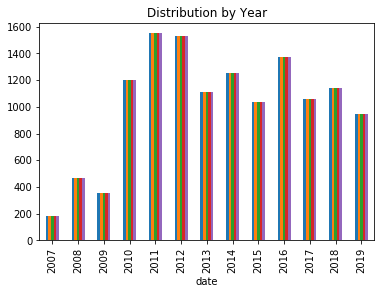

In [18]:
#by year
ax = ver_df.groupby(ver_df.date.dt.year).count().plot(kind="bar")
ax.legend_ = None
plt.title("Distribution by Year")
plt.show()

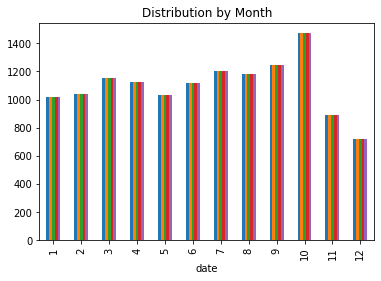

In [19]:
#by month
ax = ver_df.groupby(ver_df.date.dt.month).count().plot(kind="bar")
ax.legend_ = None
plt.title("Distribution by Month")
plt.show()

In [20]:
cleaned_df = ver_df[["date","source","statement","veracity"]]

In [21]:
cleaned_df[:100:10]

,date,source,statement,veracity
0,2019-10-25,Facebook posts,"Says that in 1770 ""British parliament banned lipstick, saying it had the power to seduce men into marriage, which was classified as witchcraft.""",0
12,2019-10-24,Viral image,Says a photo shows a driver and passengers wearing moose heads in a truck with a man strapped to the roof that caused 16 accidents on I-35.,0
22,2019-10-22,Association of Mature American Citizens,"AARP backed ""federal funding for Planned Parenthood.""",0
32,2019-10-17,Richard Ojeda,"""75-100 folks (are) killed a month and over 200 wounded by senseless gun violence.""",0
45,2019-10-16,Pete Buttigieg,"Americans ""say that what they want is a choice"" to join a single-payer system like Medicare rather than ending private insurance.",1
56,2019-10-11,Mark Levin,"Says the whistleblower hired ""left-wing lawyers, left-wing firms, Soros involved in funding all of them.""",0
66,2019-10-09,Donald Trump,"""The first so-called second hand information ‘Whistleblower’ got my phone conversation almost completely wrong.""",0
76,2019-10-04,Roger Williams,"""50% of the DUIs on Interstate 35 are from illegals. Ninety percent of the 50% have absolutely no identification.""",0
87,2019-10-02,Viral image,"Says a photo shows Beto O’Rourke ""in college drunk and pissing his pants.""",0
98,2019-09-30,Facebook posts,"Says Republican Gov. Phil Scott ""just voted to impeach President Trump.""",0


In [22]:
cleaned_df.to_csv('2020_04_13_politifact_cleaned_data.csv')